# Project Code

In [18]:
import tensorflow
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns; sns.set()
from tensorflow.keras import datasets, layers, models
import time
from datetime import datetime

import warnings
warnings.filterwarnings(action="ignore")

## Loading and Exploring the Data Set

In [2]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

Looking and the Shape and see the first images in the data set

In [3]:
print("x_train shape : ",x_train.shape)
print("Y_train sahpe : ",y_train.shape)

x_train shape :  (50000, 32, 32, 3)
Y_train sahpe :  (50000, 1)


Chaging shape of Y values to single dimension number array

In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print("y_train",y_train)
print("y_train shape",y_train.shape)

y_train [6 9 9 ... 9 1 1]
y_train shape (50000,)


Setting up the labels for the data

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Printing out the first few pictures with labels

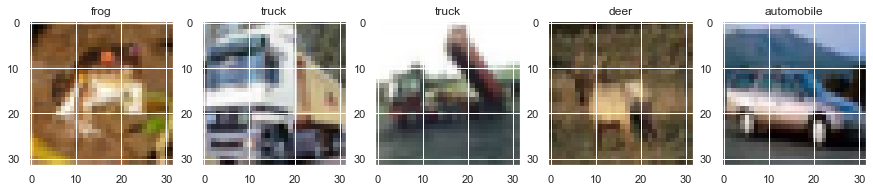

In [7]:
fig, axes = plt.subplots(ncols=5,figsize=(15, 15))

for i in range(5):
    axes[i].set_title(labels[y_train[i]])
    axes[i].imshow(x_train[i])

# Staring Machine Learning with First Model Linear Regression

### Preprocessing the data to be passed into the Model

In [6]:
x_train_reshapedto2d = x_train.reshape(50000,32*32*3)
x_test_reshapedto2d = x_test.reshape(10000 ,32*32*3)

Printing out new shape of data to be passed to Logistic Regression Modelb

In [7]:
print("X_train shape",x_train_reshapedto2d.shape)
print("X_test shape",x_test_reshapedto2d.shape)

X_train shape (50000, 3072)
X_test shape (10000, 3072)


Normalizing the dataset by dividing each value by 255 beacause each value is RGB value which ranges from 0 -255 so diving it by 255 will give us a number between 0 - 1.

In [8]:
x_train_reshapedto2d_normalized = x_train_reshapedto2d/255
x_test_reshapedto2d_normalized = x_test_reshapedto2d/255

Printing out the first few lines of data to be passed to the model

In [9]:
x_train_reshapedto2d_normalized

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

### Training the Logistic Regression Model

Setting the parameters of Logistic Regression Model. We are going to use sparse regression with l2 penality.

In [21]:
logisticRegStartTime = time.time()
logregmodel = LogisticRegression(C=0.01, multi_class='multinomial', solver='sag',penalty='l2')
logregmodel.fit(x_train_reshapedto2d_normalized,y_train)
logisticRegEndTime = time.time()

In [24]:
time_intervalLG = logisticRegEndTime - logisticRegStartTime
print("Time Taken To Train The data ",time_intervalLG/60)

Time Taken To Train The data  3.5329426407814024


### Predicting and Collecting the Results 

In [26]:
predictionsLogReg = logregmodel.predict(x_test_reshapedto2d_normalized)

In [27]:
conmaxReg = confusion_matrix(y_test, predictionsLogReg)

#### Confusion Matrix of the Result

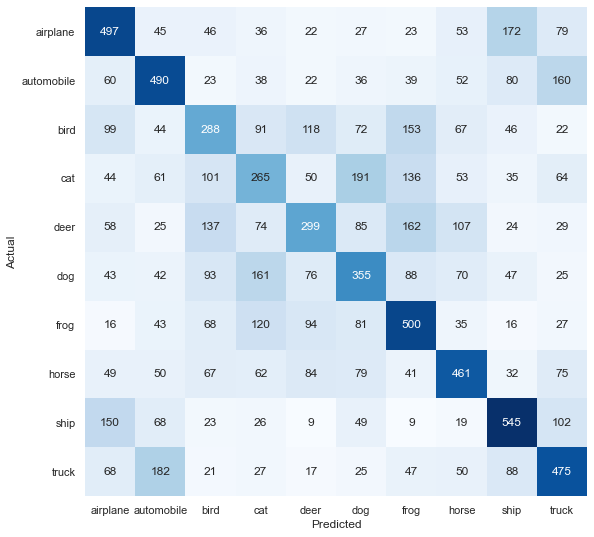

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(conmaxReg, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d',annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classificaiton Report of the Classes

In [29]:
print(classification_report(y_test,predictionsLogReg,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.46      0.50      0.48      1000
  automobile       0.47      0.49      0.48      1000
        bird       0.33      0.29      0.31      1000
         cat       0.29      0.27      0.28      1000
        deer       0.38      0.30      0.33      1000
         dog       0.35      0.35      0.36      1000
        frog       0.42      0.50      0.45      1000
       horse       0.48      0.46      0.47      1000
        ship       0.50      0.55      0.52      1000
       truck       0.45      0.47      0.46      1000

    accuracy                           0.42     10000
   macro avg       0.41      0.42      0.41     10000
weighted avg       0.41      0.42      0.41     10000



#### Overall Accuracy Of the Mode

In [30]:
print("Accuray of Logistic Regression Model is : ",accuracy_score(predictionsLogReg,y_test))

Accuray of Logistic Regression Model is :  0.4175


# Machine Learning with Deep Neural Network with Convolution Layer

Traning a simple neural network

In [32]:
model2 = keras.Sequential([
    keras.layers.Dense(3072, input_shape=(3072,), activation='relu'),
    keras.layers.Dense(1536, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train_reshapedto2d_normalized, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.8888 - accuracy: 0.3256
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6716 - accuracy: 0.3983
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6011 - accuracy: 0.4251
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5537 - accuracy: 0.4427
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5189 - accuracy: 0.4531
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4923 - accuracy: 0.4663
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4706 - accuracy: 0.4747
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4542 - accuracy: 0.4806
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4372 - accuracy: 0.4852
Epoch 10/10
1563/1563 [==============================] - 63s 41m

Checking Accuracy of the Deep Neural Network

In [33]:
model2.evaluate(x_test_reshapedto2d_normalized,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4737 - accuracy: 0.4732


[1.4736998081207275, 0.4731999933719635]

Testing and training with convolution layers added in the Neural Network

In [31]:
x_train_covnn = x_train/255
x_test_covnn = x_test/255

In [39]:
model4 = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3),strides=1,padding="same"),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',strides=1,padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',strides=1,padding="same"),
    keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.AveragePooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.AveragePooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

DNNCNNstarttime = time.time()
ModelTrainingData = model4.fit(x_train_covnn, y_train, epochs=10,batch_size=50,validation_data=(x_test_covnn,y_test))
DNNCNNEndtime = time.time()

Epoch 1/10
1000/1000 [==============================] - 161s 161ms/step - loss: 1.5576 - accuracy: 0.4268 - val_loss: 1.2132 - val_accuracy: 0.5629
Epoch 2/10
1000/1000 [==============================] - 157s 157ms/step - loss: 1.0785 - accuracy: 0.6167 - val_loss: 1.0396 - val_accuracy: 0.6380
Epoch 3/10
1000/1000 [==============================] - 159s 159ms/step - loss: 0.8698 - accuracy: 0.6906 - val_loss: 0.8521 - val_accuracy: 0.6962
Epoch 4/10
1000/1000 [==============================] - 161s 161ms/step - loss: 0.7293 - accuracy: 0.7436 - val_loss: 0.7974 - val_accuracy: 0.7266
Epoch 5/10
1000/1000 [==============================] - 163s 163ms/step - loss: 0.6254 - accuracy: 0.7793 - val_loss: 0.7352 - val_accuracy: 0.7493
Epoch 6/10
1000/1000 [==============================] - 163s 163ms/step - loss: 0.5362 - accuracy: 0.8099 - val_loss: 0.7215 - val_accuracy: 0.7569
Epoch 7/10
1000/1000 [==============================] - 163s 163ms/step - loss: 0.4597 - accuracy: 0.8374 - val_

In [40]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 32)        36896     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 128)      

In [42]:
time_intervalDNNCNN = DNNCNNEndtime - DNNCNNstarttime
print("Time Taken To Train The data ",time_intervalDNNCNN/60)

Time Taken To Train The data  27.020609664916993


Accuracy Graphs

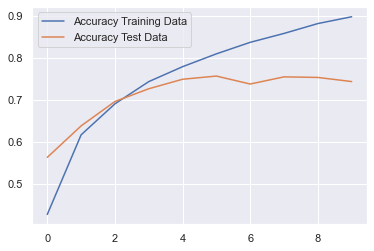

In [43]:
plt.plot(ModelTrainingData.history['accuracy'],label='Accuracy Training Data')
plt.plot(ModelTrainingData.history['val_accuracy'],label='Accuracy Test Data')
plt.legend()
plt.show()

Checking the accuracy of the  CNN Model

In [44]:
model4.evaluate(x_test_covnn,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.9567 - accuracy: 0.7438


[0.956702470779419, 0.7437999844551086]

Making the confusion matrix

In [45]:
predictions = model4.predict(x_test_covnn)

In [47]:
predictionsCNN = [np.argmax(i) for i in predictions]

In [48]:
conmaxCNN = confusion_matrix(y_test, predictionsCNN)

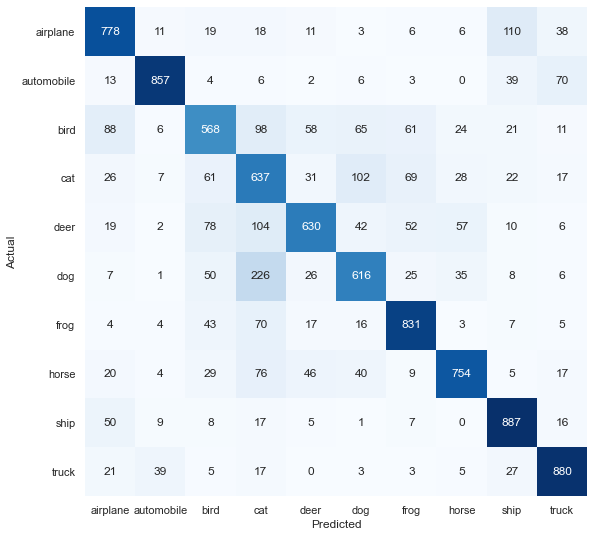

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(conmaxCNN, cbar=False, xticklabels=labels, yticklabels=labels,fmt='d',annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
print(classification_report(y_test,predictionsCNN,target_names=labels))

              precision    recall  f1-score   support

    airplane       0.76      0.78      0.77      1000
  automobile       0.91      0.86      0.88      1000
        bird       0.66      0.57      0.61      1000
         cat       0.50      0.64      0.56      1000
        deer       0.76      0.63      0.69      1000
         dog       0.69      0.62      0.65      1000
        frog       0.78      0.83      0.80      1000
       horse       0.83      0.75      0.79      1000
        ship       0.78      0.89      0.83      1000
       truck       0.83      0.88      0.85      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



### Overall Accuray of the Model

In [51]:
print("Accuray of CNN Model is : ",accuracy_score(predictionsCNN,y_test))

Accuray of CNN Model is :  0.7438


Accuracy Comparison

Text(0, 0.5, 'Accuracy %')

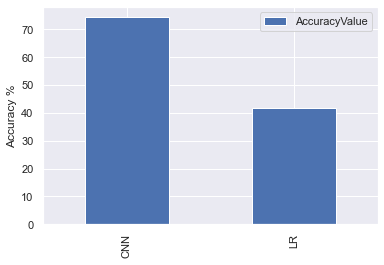

In [71]:
plotdataacc = pd.DataFrame(
    {"AccuracyValue": [74.38,41.75]}, 
    index=["CNN", "LR"])
plotdataacc.plot(kind="bar")
plt.ylabel("Accuracy %")

Text(0, 0.5, 'Traning Time (mins)')

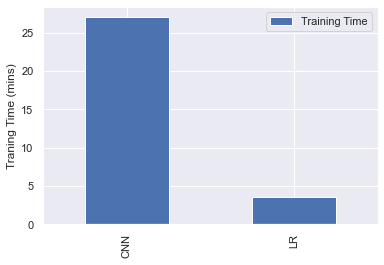

In [72]:
plotdatatimetaken = pd.DataFrame(
    {"Training Time": [27.02,3.53]}, 
    index=["CNN", "LR"])
plotdatatimetaken.plot(kind="bar")
plt.ylabel("Traning Time (mins)")